Philip McCormick

Homework 1


**1. Consider an experiment where you randomly pick 10 people and write down their
birthdays. Let X be the random variable that is 0 when nobody shares a birthday and
is 1 when at least two people share a birthday in your sample.**

**(a) Describe the sample space of this experiment.**

The sample space of this experiment is birthdays as they relate to days in a year. This means the sample space is integer numbers for 1 to 365. The probability 


**(b) Simulate this experiment and use this simulation to estimate the probability distribution of random variable X. Use at least 10,000 trials.**


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

def check(list):
  for i in list:
    if list.count(i) > 1:
      return True
    return False

outcome = []
samp_size = 10
num_experiments = 10000

for i in range(num_experiments):
  lst =  np.random.randint(low=1, high=366, size=samp_size)
  list = lst.tolist()
  result = check(list)
  if result:
    outcome.append(1)
  else:
    outcome.append(0)

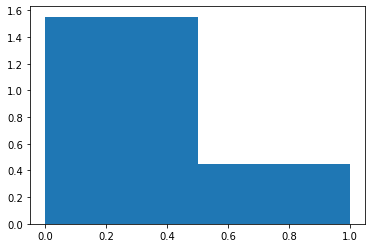

In [62]:
plt.hist(results, bins=2, range=(0,1), density= True)
plt.show()

**(c) What happens if I change my experiment to pick more people? Visualize this change
using a few estimated probability distributions.**

As the number of people in the sample size increases, the likelihood of people having the same birthday increases. Therefore the probability distribution begins to equal out, and will eventually tip in favor of people with same birthdays.

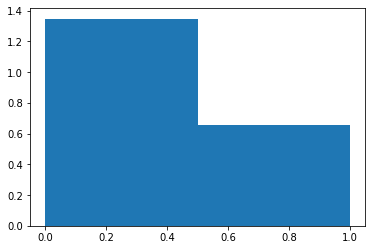

In [48]:
def check_if_dup(list):
  for i in list:
    if list.count(i) > 1:
      return True
    return False

outcome2 = []
samp_size2 = 150
num_experiments = 10000

for i in range(num_experiments):
  lst =  np.random.randint(low=1, high=366, size=samp_size2)
  list = lst.tolist()
  result = check_if_dup(list)
  if result:
    outcome2.append(1)
  else:
    outcome2.append(0)

plt.hist(outcome2, bins=2, range=(0,1), density= True)
plt.show()

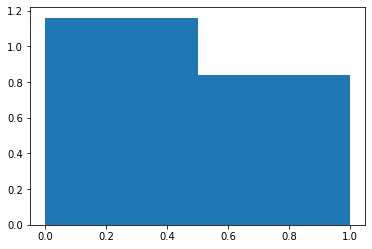

In [39]:
def check_if_dup(list):
  for i in list:
    if list.count(i) > 1:
      return True
    return False

outcome3 = []
samp_size3 = 200
num_experiments = 10000

for i in range(num_experiments):
  lst =  np.random.randint(low=1, high=366, size=samp_size3)
  list = lst.tolist()
  result = check_if_dup(list)
  if result:
    outcome3.append(1)
  else:
    outcome3.append(0)

plt.hist(outcome3, bins=2, range=(0,1), density= True)
plt.show()

**2. Consider the olympic athlete data from the January 31st lecture.**

**(a) Choose a country and set up a Hypothesis Test to decide whether a random sample
of 100 athletes from that country have a mean weight different from the population
mean.**

In [49]:
df = pd.read_csv('/content/drive/MyDrive/MSDS 597/Data/athlete_events.csv')
df.columns


Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [54]:
# population mean
pop_mean = df['Weight'].mean()
print(pop_mean)

70.70239290053351


In [ ]:
df_sample = df[df['Team'] == 'Mexico'].sample(100)
print(df_sample)

In [57]:
samp_mean = df_sample['Weight'].mean()
print(samp_mean)

66.67283950617283


**(b) Calculate the p-value to determine whether to reject or fail to reject the null hypothesis
with a significance level of α = 0.01.**

In [59]:
import scipy.stats

std_error = scipy.stats.sem(df_sample['Weight'], nan_policy='omit')
std_error

1.0965420006053583

In [63]:
z_score = (samp_mean - pop_mean) / (std_error)
z_score

-3.6747825364975673

In [64]:
# p-value
def p_left_of_z(z_score):
  return scipy.stats.norm(0, 1).cdf(z_score)

p = 2*p_left_of_z(-z_score)
p

1.9997619479147333

In [65]:
if p < .01:
  print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


**3. Import the Advertising dataset found on Canvas looking at dollars spent by businesses
on advertising in various mediums along with the associated sales that quarter.**

**(a) What variables in this dataset appear linearly correlated? Pick a pair that look linearly
correlated and calculate the R2value for a line of best fit using OLS.**

In [77]:
import seaborn as sns

advert = pd.read_csv('/content/drive/MyDrive/Data 598/Advertising.csv')
advert.columns
advert.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


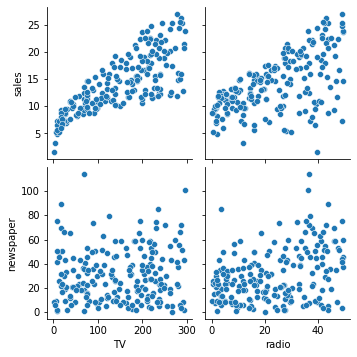

In [67]:
sns.pairplot(advert,
             x_vars = ['TV', 'radio'],
             y_vars= ['sales', 'newspaper'])

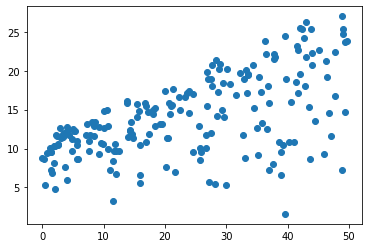

In [68]:
plt.scatter(x=advert['radio'], y=advert['sales'])

In [69]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(advert['radio'], advert['sales'])
print(r_value)

0.576222574571055


In [26]:
x_values = advert['radio']
y_values = advert['sales']

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.33203245544529514


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


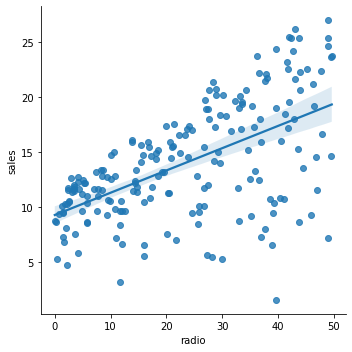

In [81]:
from statsmodels.formula.api import ols

model = ols(formula = 'radio ~ sales', data=advert)

res = model.fit()
res.summary()

sns.lmplot(x='radio',y='sales',data=advert)

**b) Explain in your own words what the relationship between these two variables using
the line of best fit.**

There appears to be a positive relationship between the variables "radio" and "sales". As "sales" increases, "radio" increases, and vice versa.

**4. Consider the TV and sales variables.**

**(a) Are they linearly correlated? Are they correlated in some other way?**

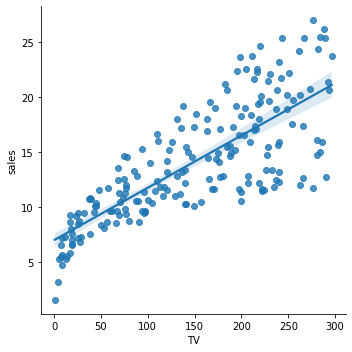

In [28]:
model = ols(formula = 'TV ~ sales', data=advert)

res = model.fit()
res.summary()

sns.lmplot(x='TV',y='sales',data=advert)

There is a positive linear correlation between the variables "TV" and "sales". This is shown by the OLS Model above, as one variable increases, the other variable increases alongside.

**(b) How might we create (or engineer ) a feature from the TV variable that was linearly
correlated with sales?**

A way to create a feature from the TV variable that's linearly correlated with sales would be to use e to the negative power of the variable.

**5. Import the Penguins dataset we looked at in class on January 24th.**

**(a) Which other numerical variable predict bill length the best with a linear model? What
is the R2for each of these?**

In [71]:
penguins = sns.load_dataset('penguins')
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


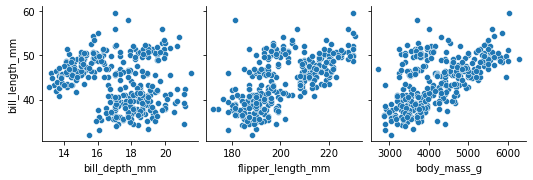

In [79]:
#comparison of other numeric variables
sns.pairplot(penguins,
             y_vars = ['bill_length_mm'],
             x_vars= ['bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

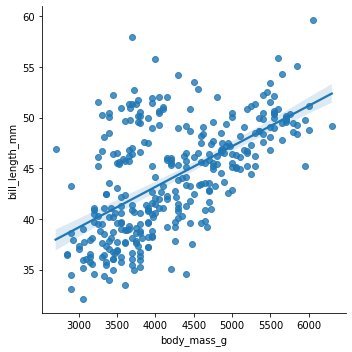

In [82]:
# body mass as it relates to bill length (mm)
model = ols(formula = 'body_mass_g ~ bill_length_mm', data=penguins)

res = model.fit()
res.summary()

sns.lmplot(x='body_mass_g',y='bill_length_mm',data=penguins)

In [83]:
# R^2 value
x_val = penguins['body_mass_g']
y_val = penguins['bill_length_mm']

correlation_matrix = np.corrcoef(x_val, y_val)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.34745261128883764


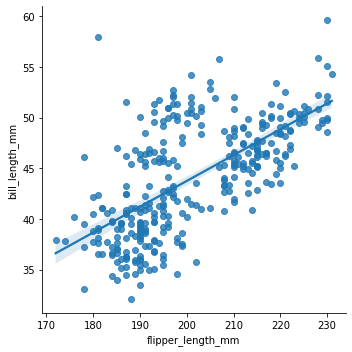

In [33]:
# flipper length (mm) as it relates to bill length (mm)
model = ols(formula = 'flipper_length_mm ~ bill_length_mm', data=penguins)

res = model.fit()
res.summary()

sns.lmplot(x='flipper_length_mm',y='bill_length_mm',data=penguins)

In [34]:
# R^2 value
x_val = penguins['flipper_length_mm']
y_val = penguins['bill_length_mm']

correlation_matrix = np.corrcoef(x_val, y_val)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.42653391324596834


Since the variable 'flipper_length_mm' and 'bill_length_mm' have a higher R^2 value (0.43) than 'body_mass_g' and 'bill_length_mm' (0.35), this means the regression line is more accurate in the former, therefore is a better linear model.

**(b) What if we create a separate linear model for each species to predict bill length? Does
the overall effectiveness of our model improve? Use R2values to make your decision.**

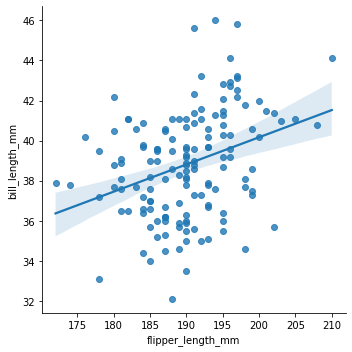

In [35]:
# Linear regression for "Adelie" penguins

df_a = penguins[penguins['species'] == 'Adelie']

model = ols(formula = 'flipper_length_mm ~ bill_length_mm', data=df_a)

res = model.fit()
res.summary()

sns.lmplot(x='flipper_length_mm',y='bill_length_mm',data=df_a)

In [36]:
# R^2 for "Adelie" penguins

x_val = df_a['flipper_length_mm']
y_val = df_a['bill_length_mm']

correlation_matrix = np.corrcoef(x_val, y_val)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.11040598588671789


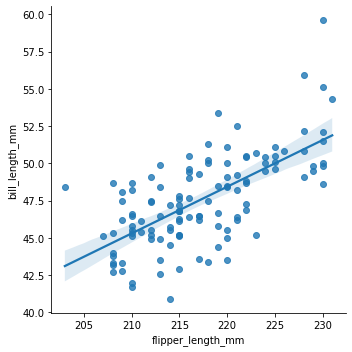

In [37]:
# Linear regression for "Gentoo" penguins

df_g = penguins[penguins['species'] == 'Gentoo']

model = ols(formula = 'flipper_length_mm ~ bill_length_mm', data=df_g)

res = model.fit()
res.summary()

sns.lmplot(x='flipper_length_mm',y='bill_length_mm',data=df_g)

In [38]:
# R^2 for "Gentoo" penguins

x_val = df_g['flipper_length_mm']
y_val = df_g['bill_length_mm']

correlation_matrix = np.corrcoef(x_val, y_val)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.4411686007680154


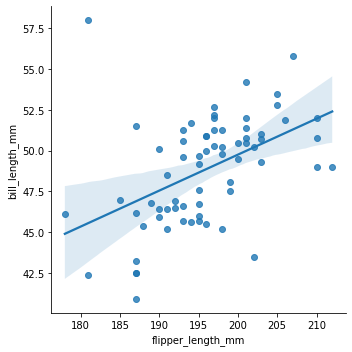

In [39]:
# Linear regression for "Chinstrap" penguins

df_c = penguins[penguins['species'] == 'Chinstrap']

model = ols(formula = 'flipper_length_mm ~ bill_length_mm', data=df_c)

res = model.fit()
res.summary()

sns.lmplot(x='flipper_length_mm',y='bill_length_mm',data=df_c)

In [40]:
# R^2 for "Chinstrap" penguins

x_val = df_c['flipper_length_mm']
y_val = df_c['bill_length_mm']

correlation_matrix = np.corrcoef(x_val, y_val)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.22241342558500818


If seperating model by species, the overall effectiveness of the model does not improve. Based on R^2 of each species, the average is .26, where as the all the species modeled together is .43. This may be due to the smaller sample size when breaking up the model into species.

**(c) Why might models get better if we create a separate linear model for each category?
Can a model get “worse” if we do this?**

Models might get better as we seperate for each categroy because there are more chances for one of those categories to be closer to original linear model. Seperating into categories could make the model "worse" compared to the orginal model due to outliers in the categories creating a much different model.

Consulted with Brooke Johnson on Q1 and Q3b.